# Исследование данных популярного сервиса аренды самокатов GoFast.

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

**План исследования данных сервиса аренды самокатов GoFast:**

1) Загрузить данные из трех таблиц:
 - информация о пользователях - users_go.csv в переменную df_users;
 - их поездках - rides_go.csv в переменную df_rides;
 - и подписках - subscriptions_go.csv в переменную df_subs.

2) Провести предобработку данных каждого датафрейма (обработать пропщенные значения, привести тип данных в порядок, выявить неявные дубликаты и обработать их, найти и устранить редкие и выбивающиеся значения и аномалии, где это возможно).

3) Выполнить исследовательский анализ данных.

4) Объединить таблицы в одну.

5) Выполнить подсчет выручки.

6) Проверить гипотезы.

7) Написать промежуточные и общий вывод про результатам исследования.


#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    df_users = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    df_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')

try:
    df_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
except:
    df_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')
    
try:
    df_subs = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    df_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')

**Вывод общей информации о датафреймах**

In [3]:
df_users.info()
display(df_users.head())
display(df_users['city'].unique())
len(df_users['city'].unique())
len(df_users['user_id'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

1534

**Данные представлены по 1534 уникальным пользователям из 8 городов России: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'. Явно есть дубликаты, их обработаем позже.**

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

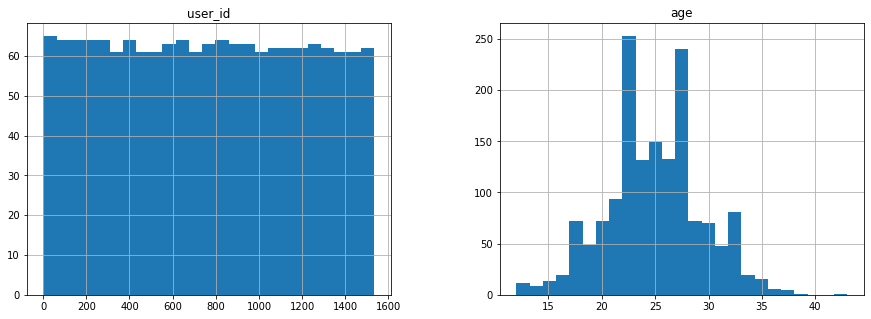

In [4]:
df_users.hist(figsize=(15, 5), bins=25)

In [5]:
df_rides.info()
display(df_rides.head())
len_df_rides = len(df_rides)
print(len_df_rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


18068


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

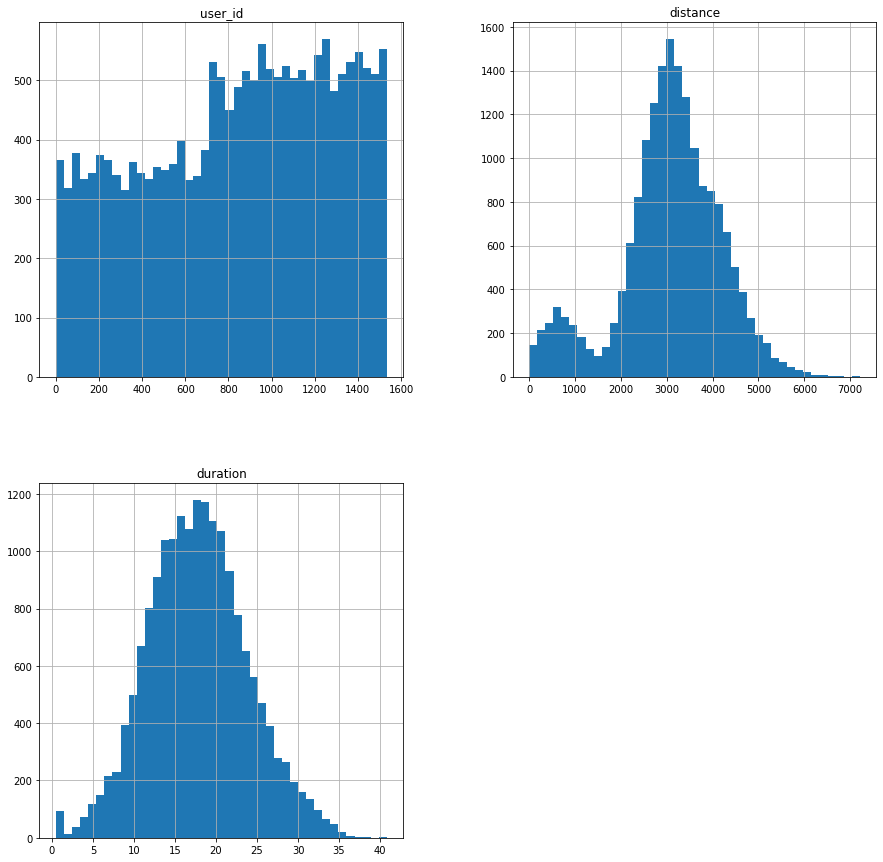

In [6]:
df_rides.hist(figsize=(15, 15), bins=41)

In [7]:
df_subs.info()
display(df_subs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Данные представлены по 1534 уникальным пользователям из 8 городов России: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'.**

#### Шаг 2. Предобработка данных

**2.1. Приведем данные столбца 'date' таблицы 'df_rides' к формату datetime.**

In [8]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')
print(df_rides['date'].min(), df_rides['date'].max())
df_rides.info()

2021-01-01 00:00:00 2021-12-30 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**Определив минимальную и максимальную даты определили период, за который необходимо проанализировать данные поездок пользователей сервиса аренды самокатов GoFast. Данные предоставлены с 01.01.2021 по 30.12.2021.**

**2.2. Добавим столбец с номером месяца 'month' в таблицу 'df_rides'**

In [10]:
df_rides['month'] = df_rides['date'].dt.month
display(df_rides[['date', 'month']])

,date,month
0,2021-01-01,1
1,2021-01-18,1
2,2021-04-20,4
3,2021-08-11,8
4,2021-08-28,8
...,...,...
18063,2021-11-04,11
18064,2021-11-16,11
18065,2021-11-18,11
18066,2021-11-27,11


In [11]:
display(df_users.isna().sum())
display(df_rides.isna().sum())
display(df_subs.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пропущенных значений нет**

**2.3. Выявим и удалим явные дубликаты в датафреймах**

In [12]:
display(df_users.duplicated().sum())
display(df_users.duplicated())
df_users = df_users.drop_duplicates().reset_index(drop=True)
df_users.info()

31

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [13]:
display(df_rides.duplicated().sum())
display(df_rides.duplicated())

0

0        False
1        False
2        False
3        False
4        False
         ...  
18063    False
18064    False
18065    False
18066    False
18067    False
Length: 18068, dtype: bool

In [14]:
display(df_subs.duplicated().sum())
display(df_subs.duplicated())

0

0    False
1    False
dtype: bool

**Удалены явные дубликаты. Неявные дубликаты не обнаружены**

**В результате предобработки данных выполнено следующее:**
 - Приведены данные столбца 'date' таблицы 'df_rides' к формату datetime. Определен период, за который необходимо проанализировать данные поездок пользователей сервиса аренды самокатов GoFast. Данные предоставлены с 01.01.2021 по 30.12.2021.
 - Добавлен столбец с номером месяца 'month' в таблицу 'df_rides'
 - Удалены явные дубликаты. Неявные дубликаты не обнаружены.

#### Шаг 3. Исследовательский анализ данных

**Опишем и визуализируем общую информацию о пользователях и поездках:**

**3.1 Частота встречаемости городов;**

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

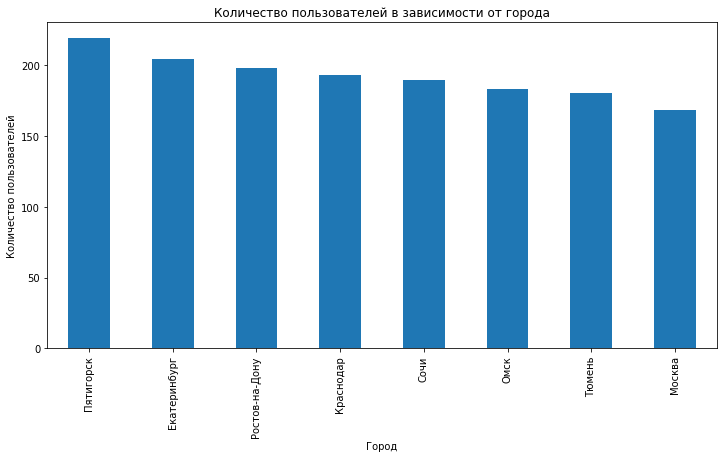

In [15]:
display(df_users['city'].value_counts())

df_users['city'].value_counts().plot.bar(figsize=(12, 6))
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.title("Количество пользователей в зависимости от города")
plt.show()

**Наибольшее количество пользователей в Пятигорске - 219, Наименьшее количество пользователей в Москве - 168.**

**3.2 Cоотношение пользователей с подпиской и без подписки;**

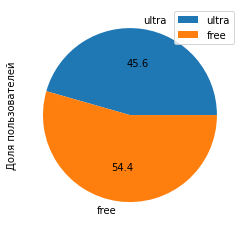

free     835
ultra    699
Name: subscription_type, dtype: int64

In [16]:
df_users['subscription_type'].value_counts(ascending=True).plot.pie(label='Доля пользователей', autopct="%.1f")
plt.legend()
plt.show()
df_users['subscription_type'].value_counts()

**Наибольшая доля пользователей с подпиской 'free' - 54,4 %, доля пользователей с подпиской 'ultra' - 45,6 %.**

**3.3 Возраст пользователей;**

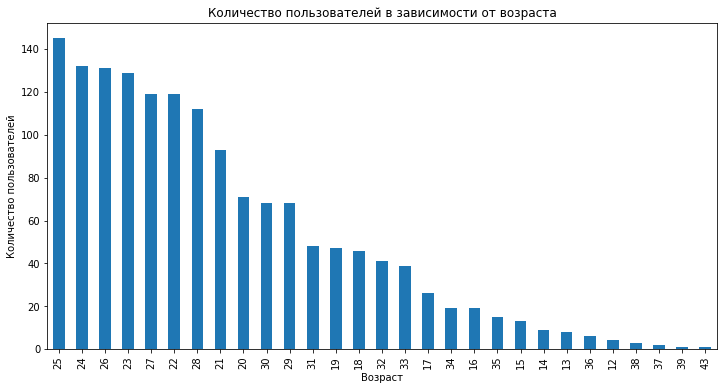

<AxesSubplot:ylabel='Frequency'>

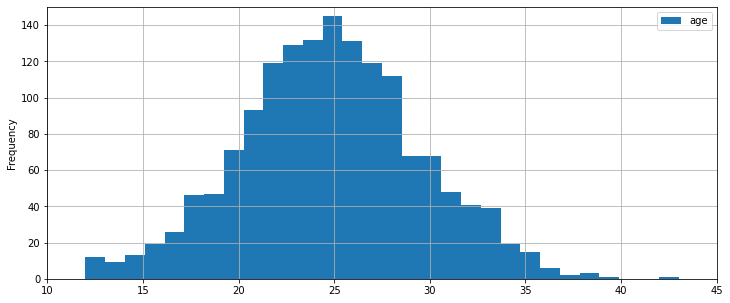

In [17]:
df_users['age'].value_counts().plot.bar(figsize=(12, 6))
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title("Количество пользователей в зависимости от возраста")
plt.show()

df_users.plot(y='age', kind='hist', bins=30, grid=True,  ylim=(0,150), xlim=(10, 45), figsize=(12, 5))

**Наибольшее количество пользователей возрастом от 22 до 28 лет. Наименьшее количество пользователей младше 16 лет и старше 34 лет.**

**3.4 Расстояние, которое пользователь преодолел за одну поездку;**

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

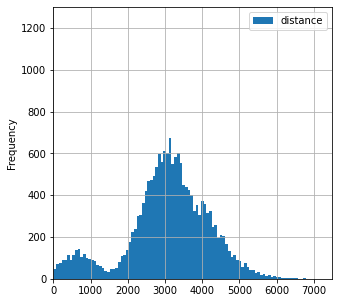

In [18]:
df_rides.plot(y='distance', kind='hist', bins=100, grid=True,  ylim=(0,1300), xlim=(0, 7500), figsize=(5, 5))

df_rides['distance'].describe()

**В основном пользователи проезжают от 2500 до 4000 м. Отмечаются 2 нормальных распределения, кажется, что это две группы данных, можно их обозначить как короткие и длинные.**

**3.5 Продолжительность поездок.**

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

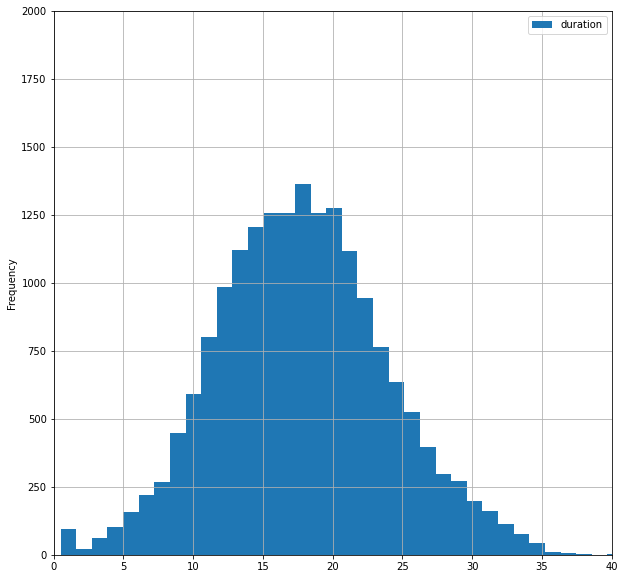

In [19]:
df_rides.plot(y='duration', kind='hist', bins=36, grid=True,  ylim=(0,2000), xlim=(0, 40), figsize=(10, 10))

df_rides['duration'].describe()

**В основном, продолжительность поездок составляет от 12 до 25 минут.**

**Общая информация о пользователях и поездках:**
- Наибольшее количество пользователей в Пятигорске - 219, Наименьшее количество пользователей в Москве - 168.
- Наибольшая доля пользователей с подпиской 'free' - 54,4 %, доля пользователей с подпиской 'ultra' - 45,6 %.
- Наибольшее количество пользователей возрастом от 22 до 28 лет. Наименьшее количество пользователей младше 16 лет и старше 34 лет.
- В основном пользователи проезжают от 2500 до 4000 м. Отмечаются 2 нормальных распределения, кажется, что это две группы данных, можно их обозначить как короткие и длинные.
- В основном, продолжительность поездок составляет от 12 до 25 минут.

#### Шаг 4. Объединение данных

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм 'total_df'.**

In [20]:
display(df_rides)
display(df_users)
total_df = df_rides
total_df=total_df.merge(df_users, on='user_id')

display(total_df)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [21]:
total_df=total_df.merge(df_subs, on='subscription_type')
display(total_df)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


**Проверим есть ли пустые значение в сведенной таблице.**

In [22]:
display(total_df.isna().sum())

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [23]:
total_df.info()
total_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772,24.893071,7.280496,32.012398,71.590658
std,434.734317,1116.831209,6.091051,3.437410,4.582216,0.959882,23.997045,95.508238
min,1.000000,0.855683,0.500000,1.000000,12.000000,6.000000,0.000000,0.000000
25%,487.000000,2543.226360,13.597563,4.000000,22.000000,6.000000,0.000000,0.000000
50%,889.000000,3133.609994,17.678395,6.000000,25.000000,8.000000,50.000000,0.000000
75%,1213.250000,3776.222735,21.724800,9.000000,28.000000,8.000000,50.000000,199.000000
max,1534.000000,7211.007745,40.823963,12.000000,43.000000,8.000000,50.000000,199.000000


**Пустых значений нет, все данные в порядке.**

**4.2 Создадим ещё два датафрейма из 'total_df':**
 - c данными о пользователях без подписки 'total_df_free';
 - с данными о пользователях с подпиской 'total_df_ultra'.

In [24]:
display(total_df.groupby('subscription_type').agg({'subscription_type': ['count']}))

total_df_free = total_df[total_df['subscription_type'] == 'free']
display(total_df_free['subscription_type'].unique())

total_df_ultra = total_df[total_df['subscription_type'] == 'ultra']
display(total_df_ultra['subscription_type'].unique())


,subscription_type
,count
subscription_type,
free,11568
ultra,6500


array(['free'], dtype=object)

array(['ultra'], dtype=object)

**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

<AxesSubplot:ylabel='Frequency'>

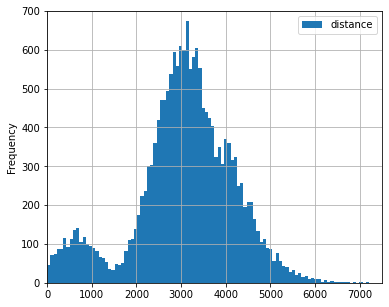

In [25]:
total_df.plot(y='distance', kind='hist', bins=100, grid=True,  ylim=(0,700), xlim=(0, 7500), figsize=(6, 5))

In [26]:
display(total_df.groupby('subscription_type').agg({'distance': ['min', 'max', 'mean', 'median']}))

distance                                       
                          min          max         mean       median
subscription_type                                                   
free                 0.855683  7211.007745  3045.495282  3114.648465
ultra              244.210438  5699.769662  3115.445388  3148.637229

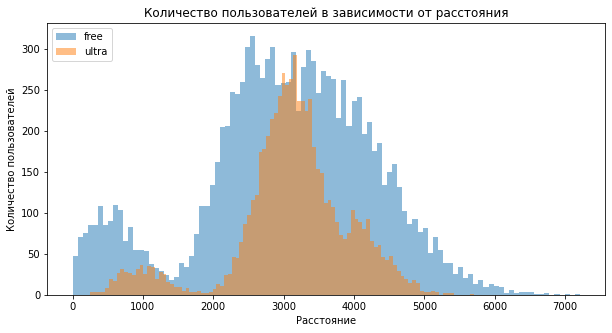

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(total_df_free['distance'], bins = 100, alpha = 0.5, label = 'free')
plt.hist(total_df_ultra['distance'], bins = 100, alpha = 0.5, label = 'ultra')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.title("Количество пользователей в зависимости от расстояния")
plt.legend(loc='upper left')
plt.show()

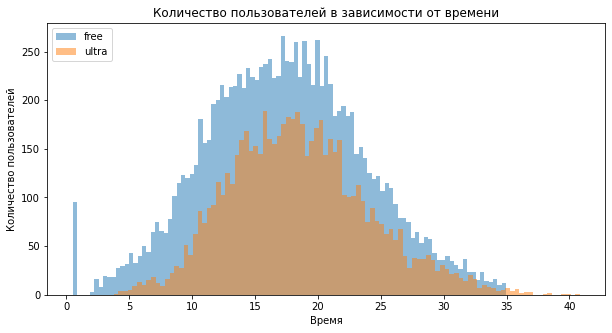

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(total_df_free['duration'], bins = 100, alpha = 0.5, label = 'free')
plt.hist(total_df_ultra['duration'], bins = 100, alpha = 0.5, label = 'ultra')
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.title("Количество пользователей в зависимости от времени")
plt.legend(loc='upper left')
plt.show()

In [29]:
display(total_df_free.describe())
display(total_df_ultra.describe())

,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,3045.495282,17.390909,6.522994,24.893326,8.0,50.0,0.0
std,241.165628,1246.173806,6.326803,3.449770,4.481100,0.0,0.0,0.0
min,700.000000,0.855683,0.500000,1.000000,12.000000,8.0,50.0,0.0
25%,915.000000,2366.562689,12.958437,4.000000,22.000000,8.0,50.0,0.0
50%,1123.000000,3114.648465,17.326890,7.000000,25.000000,8.0,50.0,0.0
75%,1328.000000,3905.697894,21.594071,9.000000,28.000000,8.0,50.0,0.0
max,1534.000000,7211.007745,34.948498,12.000000,43.000000,8.0,50.0,0.0


,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,3115.445388,18.541985,6.422308,24.892615,6.0,0.0,199.0
std,201.099339,836.895330,5.572048,3.414616,4.757208,0.0,0.0,0.0
min,1.000000,244.210438,3.760353,1.000000,12.000000,6.0,0.0,199.0
25%,175.000000,2785.444017,14.524654,4.000000,22.000000,6.0,0.0,199.0
50%,351.000000,3148.637229,18.178153,6.000000,25.000000,6.0,0.0,199.0
75%,525.000000,3560.574425,21.884129,9.000000,28.000000,6.0,0.0,199.0
max,699.000000,5699.769662,40.823963,12.000000,38.000000,6.0,0.0,199.0


**Из данных таблиц видно, что id пользователей с подпиской 'ultra' варьируется от 1 до 699, а id пользователей с подпиской 'free' - от 700 до 1534. Для пользователей с подпиской 'ultra' среднее и медиана для столбца с расстоянием составляет 3115 и 3149 м, для столбца с продолжительностью - 19 и 18 минут. Для пользователей с подпиской 'free' среднее и медиана для столбца с расстоянием составляет 3045 и 3115 м, для столбца с продолжительностью - 17 и 17 минут. В целом выборки похожи.**

**Объединение данных**
- Объединены данные о пользователях, поездках и подписках в один датафрейм 'total_df'.
- Созданы ещё два датафрейма из 'total_df': c данными о пользователях без подписки 'total_df_free'; с данными о пользователях с подпиской 'total_df_ultra'.
- Из данных таблиц видно, что id пользователей с подпиской 'ultra' варьируется от 1 до 699, а id пользователей с подпиской 'free' - от 700 до 1534. Для пользователей с подпиской 'ultra' среднее и медиана для столбца с расстоянием составляет 3115 и 3149 м, для столбца с продолжительностью - 19 и 18 минут. Для пользователей с подпиской 'free' среднее и медиана для столбца с расстоянием составляет 3045 и 3115 м, для столбца с продолжительностью - 17 и 17 минут. В целом выборки похожи.

#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [30]:
total_df['distance'] = total_df['distance'].round(decimals=2)
total_df['duration'] = total_df['duration'].round(decimals=0)

total_df_grouped = total_df.groupby(['user_id', 'month']) \
.agg({'distance': ['sum', 'count'], 'duration': 'sum', 'subscription_type': 'first', \
      'minute_price': 'first', 'start_ride_price': 'first', 'subscription_fee': 'first'}).reset_index(drop=False)

total_df_grouped.columns = ['user_id', 'month', 'distance_sum', 'rides_count', 'duration_sum', \
                            'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']

total_df_grouped


,user_id,month,distance_sum,rides_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.51,2,42.0,ultra,6,0,199
1,1,4,754.16,1,6.0,ultra,6,0,199
2,1,8,6723.47,2,45.0,ultra,6,0,199
3,1,10,5809.91,2,32.0,ultra,6,0,199
4,1,11,7003.50,3,53.0,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.47,2,24.0,free,8,50,0
11327,1534,8,7622.45,2,47.0,free,8,50,0
11328,1534,9,4928.17,1,23.0,free,8,50,0
11329,1534,11,13350.02,4,76.0,free,8,50,0


**5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь — обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Минуты при подсчёте стоимости округлим до ближайшего целого числа.**

In [31]:
total_df_grouped['revenue'] = total_df_grouped['start_ride_price']*total_df_grouped['rides_count'] \
+total_df_grouped['minute_price']*total_df_grouped['duration_sum']+total_df_grouped['subscription_fee']
total_df_grouped.head()

,user_id,month,distance_sum,rides_count,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.51,2,42.0,ultra,6,0,199,451.0
1,1,4,754.16,1,6.0,ultra,6,0,199,235.0
2,1,8,6723.47,2,45.0,ultra,6,0,199,469.0
3,1,10,5809.91,2,32.0,ultra,6,0,199,391.0
4,1,11,7003.50,3,53.0,ultra,6,0,199,517.0


**Подсчёт выручки**
- Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

In [32]:
# Код ревьюера
total_df_grouped.groupby('subscription_type')['revenue'].mean()

subscription_type
free     321.753457
ultra    358.589676
Name: revenue, dtype: float64

#### Шаг 6. Проверка гипотез

**6.1  Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании.** 

 - Нулевая гипотеза: средние продолжительности поездок пользователей с подпиской и без подписки одинаковы.

 - Альтернативная гипотеза: средняя продолжительность поездок пользователей с подпиской больше, чем средняя продолжительность поездок пользователей без подписки.

In [33]:
print(total_df_ultra['duration'].mean())
print(total_df_free['duration'].mean())

18.54198516280583
17.39090929866399


In [34]:
alpha = 0.05
results = st.ttest_ind(total_df_ultra['duration'], total_df_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Нулевая гипотеза о равенстве средней продолжительности поездок пользователей с подпиской и без подписки отвергнута. Принимаем альтернативную гипотезу о том, что средняя продолжительность поездок пользователей с подпиской ultra значимо больше, чем средняя продолжительность поездок пользователей с подпиской free.**

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу**

 - Нулевая гипотеза: среднее расстояние одной поездки пользователей с подпиской не превышает 3130м.

 - Альтернативная гипотеза: среднее расстояние одной поездки пользователей с подпиской более 3130м.

In [35]:
print(total_df_ultra['distance'].mean())

3115.4453880370247


In [36]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(total_df_ultra['distance'], distance, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Нулевая гипотеза о том, что среднее расстояние одной поездки пользователей с подпиской не превышает 3130м не отвергнута.**

**6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

- Нулевая гипотеза: средние помесячные выручки от пользователей с подпиской и без подписки одинаковы.

- Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской больше, чем средняя помесячная выручка от пользователей без подписки.

In [37]:
total_df_grouped_free = total_df_grouped[total_df_grouped['subscription_type'] == 'free']
total_df_grouped_ultra = total_df_grouped[total_df_grouped['subscription_type'] == 'ultra']

In [38]:
print(total_df_grouped_ultra['revenue'].mean())
print(total_df_grouped_free['revenue'].mean())

358.5896757114494
321.75345689908795


In [39]:
alpha = 0.05
results = st.ttest_ind(total_df_grouped_ultra['revenue'], total_df_grouped_free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.7274069878387966e-37
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута. Средняя помесячная выручка от пользователей с подпиской значимо больше, чем средняя помесячная выручка от пользователей без подписки.**

**6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Ответ: В данном случае будет проверяться гипотеза о равенстве средних для зависимых (парных) выборок, тоесть рассматривается генеральная выборка, с которой произошли некоторые изменения. При этом применяется метод scipy.stats.ttest_rel(before, after).**

**Проверка гипотез**
- Нулевая гипотеза о равенстве средней продолжительности поездок пользователей с подпиской и без подписки отвергнута. Принимаем альтернативную гипотезу о том, что средняя продолжительность поездок пользователей с подпиской ultra значимо больше, чем средняя продолжительность поездок пользователей без подписки.
- Нулевая гипотеза о том, что среднее расстояние одной поездки пользователей с подпиской не превышает 3130м не отвергнута.
- Нулевая гипотеза отвергнута. Средняя помесячная выручка от пользователей с подпиской значимо больше, чем средняя помесячная выручка от пользователей без подписки.

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
Ответ: В данном случае будет проверяться гипотеза о равенстве средних для зависимых (парных) выборок, тоесть рассматривается генеральная выборка, с которой произошли некоторые изменения. При этом применяется метод scipy.stats.ttest_rel(before, after).**

# Общий вывод:

Дано 3 датафрейма о пользователях сервиса аренды самокатов GoFast и об их поездках. Данные представлены по 1534 уникальным пользователям из 8 городов России: 'Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар', 'Пятигорск', 'Екатеринбург', 'Сочи'.
 
В результате предобработки данных выполнено следующее:

 - Приведены данные столбца 'date' таблицы 'df_rides' к формату datetime. Определен период, за который необходимо проанализировать данные поездок пользователей сервиса аренды самокатов GoFast. Данные предоставлены с 01.01.2021 по 30.12.2021.
 - Добавлен столбец с номером месяца 'month' в таблицу 'df_rides'
 - Удалены явные дубликаты. Неявные дубликаты не обнаружены.

Общая информация о пользователях и поездках:
- Наибольшее количество пользователей в Пятигорске - 219, Наименьшее количество пользователей в Москве - 168.
- Наибольшая доля пользователей с подпиской 'free' - 54,4 %, доля пользователей с подпиской 'ultra' - 45,6 %.
- Наибольшее количество пользователей возрастом от 22 до 28 лет. Наименьшее количество пользователей младше 16 лет и старше 34 лет.
- В основном пользователи проезжают от 2500 до 4000 м. Отмечаются 2 нормальных распределения, кажется, что это две группы данных, возможно, это связано с типом подписки, пока не рекомендуется удалять значения с расстоянием менее 1500м.
- В основном, продолжительность поездок составляет от 12 до 25 минут.

Объединение данных
- Объединены данные о пользователях, поездках и подписках в один датафрейм 'total_df'.
- Созданы ещё два датафрейма из 'total_df': c данными о пользователях без подписки 'total_df_free'; с данными о пользователях с подпиской 'total_df_ultra'.
- Из данных таблиц видно, что id пользователей с подпиской 'ultra' варьируется от 1 до 699, а id пользователей с подпиской 'free' - от 700 до 1534. Для пользователей с подпиской 'ultra' среднее и медиана для столбца с расстоянием составляет 3115 и 3149 м, для столбца с продолжительностью - 19 и 18 минут. Для пользователей с подпиской 'free' среднее и медиана для столбца с расстоянием составляет 3045 и 3115 м, для столбца с продолжительностью - 17 и 17 минут. В целом выборки похожи.

**Подсчёт выручки**
- Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными, найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.

**Проверка гипотез**
- Нулевая гипотеза о равенстве средней продолжительности поездок пользователей с подпиской и без подписки отвергнута. Принимаем альтернативную гипотезу о том, что средняя продолжительность поездок пользователей с подпиской ultra значимо больше, чем средняя продолжительность поездок пользователей без подписки.
- Нулевая гипотеза о том, что среднее расстояние одной поездки пользователей с подпиской не превышает 3130м не отвергнута.
- Нулевая гипотеза отвергнута. Средняя помесячная выручка от пользователей с подпиской значимо больше, чем средняя помесячная выручка от пользователей без подписки.

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
Ответ: В данном случае будет проверяться гипотеза о равенстве средних для зависимых (парных) выборок, тоесть рассматривается генеральная выборка, с которой произошли некоторые изменения. При этом применяется метод scipy.stats.ttest_rel(before, after).**